<a href="https://colab.research.google.com/github/navyarejeti/Assignment1_DAI-101/blob/main/Melbourne_housing_data_data_cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [188]:
df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [189]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [190]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [192]:
df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34857,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,2017-05-23 11:01:38.838109696,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,2016-11-19 00:00:00,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,2017-10-28 00:00:00,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,2018-03-17 00:00:00,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000
std,0.969933,6.414671e+05,NaN,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313


In [193]:
bucket_stats = df.groupby("CouncilArea")["Price"].agg(["min", "max"]).sort_values("min")
print("Price Ranges for Each Suburb:")
for bucket, row in bucket_stats.iterrows():
    print(f"{bucket}:{row['min']} - {row['max']}")

Price Ranges for Each Suburb:
Maribyrnong City Council:85000.0 - 3400000.0
Stonnington City Council:112000.0 - 7000000.0
Melbourne City Council:121000.0 - 6500000.0
Glen Eira City Council:131000.0 - 3630000.0
Brimbank City Council:145000.0 - 1750000.0
Darebin City Council:145000.0 - 4300000.0
Boroondara City Council:160000.0 - 8000000.0
Moreland City Council:170000.0 - 3935000.0
Port Phillip City Council:211000.0 - 6400000.0
Moonee Valley City Council:222000.0 - 3900000.0
Kingston City Council:240000.0 - 3000000.0
Whittlesea City Council:240000.0 - 1170000.0
Frankston City Council:266000.0 - 1905000.0
Yarra City Council:270000.0 - 4011000.0
Greater Dandenong City Council:275500.0 - 1400000.0
Wyndham City Council:280000.0 - 1305000.0
Melton City Council:280000.0 - 1152000.0
Hume City Council:280000.0 - 1515000.0
Hobsons Bay City Council:285000.0 - 4020000.0
Moorabool Shire Council:285000.0 - 545000.0
Whitehorse City Council:288000.0 - 5000000.0
Bayside City Council:290000.0 - 11200000.0

The Building area and Year Built columns are having Nans for >60% of the data, so it make sense to drop the column rather than filling it.

In [194]:
df.drop(['BuildingArea', 'YearBuilt'], axis=1, inplace=True)

**FILLING THE MISSING VALUES**

***for Numerical Columns***

predicting the NaNs in some skewed columns using their k-nearest neighbour values would be appropriate because they dont have any relation

In [195]:
from sklearn.impute import KNNImputer
skewed_columns = ['Price', 'Landsize', 'Distance', 'Lattitude', 'Longtitude', 'Postcode']
imputer = KNNImputer(n_neighbors=5)
df[skewed_columns] = imputer.fit_transform(df[skewed_columns])

and the remaining random columns are filled with the most frequent values

In [196]:
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].mode()[0])

In [197]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])

In [198]:
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])

as each region has a specific property count, property counts are filled accoring to the regions

In [204]:
df['Propertycount'] = df.groupby('Regionname')['Propertycount'].transform(lambda x: x.fillna(x.median()))

***for categorical columns***

as we do not know the names of NaNs in council areas and regions we fill them with 'Uknown'

In [201]:
df['CouncilArea'] = df['CouncilArea'].fillna('Unknown')

In [202]:
df['Regionname'] = df['Regionname'].fillna('Unknown')
df['Regionname'].value_counts()

,count
Regionname,
Southern Metropolitan,11836
Northern Metropolitan,9557
Western Metropolitan,6799
Eastern Metropolitan,4377
South-Eastern Metropolitan,1739
Eastern Victoria,228
Northern Victoria,203
Western Victoria,115
Unknown,3


In [211]:
df.isna().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


## **Identifying Duplicates**

In [212]:
duplicates = df[df.duplicated()]
print(duplicates)

           Suburb        Address  Rooms Type     Price Method SellerG  \
15858  Nunawading  1/7 Lilian St      3    t  745600.0     SP  Jellis   

            Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
15858 2017-06-17      15.4    3131.0       3.0       3.0  2.0     405.0   

                   CouncilArea  Lattitude  Longtitude            Regionname  \
15858  Manningham City Council  -37.82678   145.16777  Eastern Metropolitan   

      Propertycount  
15858        4973.0  


In [213]:
df_unique = df.drop_duplicates()

removing duplicates so that only a single row exists with that unique id

In [214]:
duplicates

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,745600.0,SP,Jellis,2017-06-17,15.4,3131.0,3.0,3.0,2.0,405.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [215]:
def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.select_dtypes(include=np.number).columns:  # Select numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = list(outliers)
    return outlier_indices

# Detect outliers
outliers = detect_outliers_iqr(df)
for col, indices in outliers.items():
    print(f"{col}: {len(indices)} outliers")

Rooms: 33 outliers
Price: 1613 outliers
Distance: 1467 outliers
Postcode: 959 outliers
Bedroom2: 14759 outliers
Bathroom: 371 outliers
Car: 1514 outliers
Landsize: 1034 outliers
Lattitude: 972 outliers
Longtitude: 1373 outliers


removing outliers in Rooms column as removing them wouldn't affect the dataset distribution

In [216]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers for specific numeric columns
df = remove_outliers_iqr(df, ["Rooms"])

replacing other outliers with their median would be appropriate as this is a skewed dataset

In [223]:
def replace_outliers_with_median(df, columns):
    for col in columns:
        if df[col].dtype in ['int64', 'float64']:  # Ensure numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_value = df[col].median()

            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])
    return df

#columns to fix
replace_median = ['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                  'Propertycount', 'Landsize', 'Lattitude', 'Longtitude']

df = replace_outliers_with_median(df, replace_median)

# **Univariate Analysis**

**Summary**

In [224]:
df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,34824.000000,3.482400e+04,34824,34824.000000,34824.000000,34824.0,34824.000000,34824.00000,34824.000000,34824.000000,34824.000000,34824.000000
mean,3.025270,9.368257e+05,2017-05-23 12:14:53.177119232,10.143935,3101.773564,3.0,1.441161,1.68918,477.567756,-37.809297,145.008634,7212.299851
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,3.0,0.000000,0.00000,0.000000,-38.027040,144.730180,1.000000
25%,2.000000,6.537900e+05,2016-11-19 00:00:00,6.400000,3051.000000,3.0,1.000000,1.00000,291.200000,-37.859374,144.946329,4385.000000
50%,3.000000,9.000000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.0,1.000000,2.00000,532.625000,-37.808300,145.008800,6763.000000
75%,4.000000,1.170000e+06,2017-10-28 00:00:00,13.400000,3148.000000,3.0,2.000000,2.00000,650.000000,-37.757343,145.069380,9758.000000
max,7.000000,1.955600e+06,2018-03-17 00:00:00,23.800000,3207.000000,3.0,3.000000,3.00000,1188.000000,-37.589930,145.277700,17496.000000
std,0.950755,3.732316e+05,NaN,4.874742,58.698993,0.0,0.611594,0.63233,249.985387,0.076900,0.095993,3834.097437


In [225]:
df.describe(include="object")

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,34824,34824,34824,34824,34824,34824,34824
unique,351,33978,3,9,388,34,9
top,Reservoir,5 Charles St,h,S,Jellis,Boroondara City Council,Southern Metropolitan
freq,844,6,23951,19727,3358,3671,11826


In [226]:
median_values = numerical_cols.median()
mode_values = numerical_cols.mode().iloc[0]  # Gets the first mode for each column
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

Median Values:
 Rooms                 3.0000
Price            900000.0000
Distance             10.3000
Postcode           3103.0000
Bedroom2              3.0000
Bathroom              1.0000
Car                   2.0000
Landsize            532.6500
Lattitude           -37.8083
Longtitude          145.0088
Propertycount      6763.0000
dtype: float64
Mode Values:
 Rooms                 3.0000
Price            900000.0000
Distance             10.3000
Postcode           3103.0000
Bedroom2              3.0000
Bathroom              1.0000
Car                   2.0000
Landsize              0.0000
Lattitude           -37.8562
Longtitude          145.0196
Propertycount      6763.0000
Name: 0, dtype: float64


In [227]:
skewness_values = numerical_cols.skew()
print("Skewness:\n", skewness_values)

Skewness:
 Rooms            0.229136
Price            0.693548
Distance         0.436803
Postcode         0.140156
Bedroom2         0.000000
Bathroom         1.026642
Car             -0.747515
Landsize        -0.138814
Lattitude       -0.255835
Longtitude      -0.411586
Propertycount    0.612158
dtype: float64


**Frequency Distribution**

In [228]:
categorical_cols = df.select_dtypes(include=["object"])  # Select categorical columns

for col in categorical_cols:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency distribution for Suburb:
Suburb
Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            484
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: count, Length: 351, dtype: int64


Frequency distribution for Address:
Address
5 Charles St        6
25 William St       4
16 Smith St         3
13 Robinson St      3
53 William St       3
                   ..
48 Stewart St       1
2/2 Nicholls Rd     1
17 Fraser St        1
11a Bewdley St      1
3 Tarrengower St    1
Name: count, Length: 33978, dtype: int64


Frequency distribution for Type:
Type
h    23951
u     7295
t     3578
Name: count, dtype: int64


Frequency distribution for Method:
Method
S     19727
SP     5093
PI     4843
VB     3104
SN     1314
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64


Frequency distribution for SellerG:
SellerG
Jellis        

**Histogram**

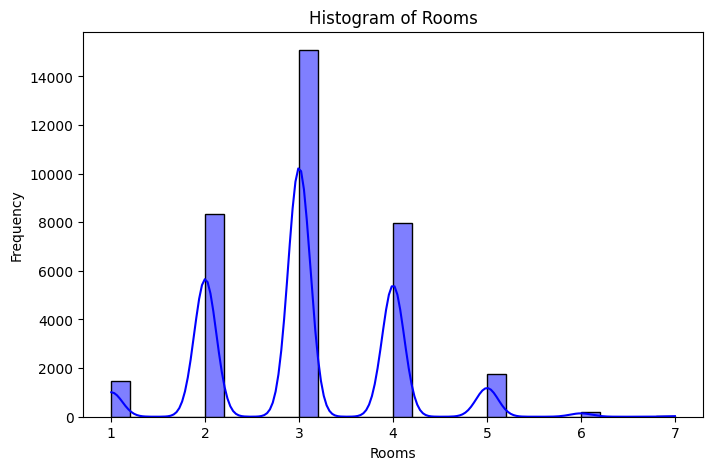

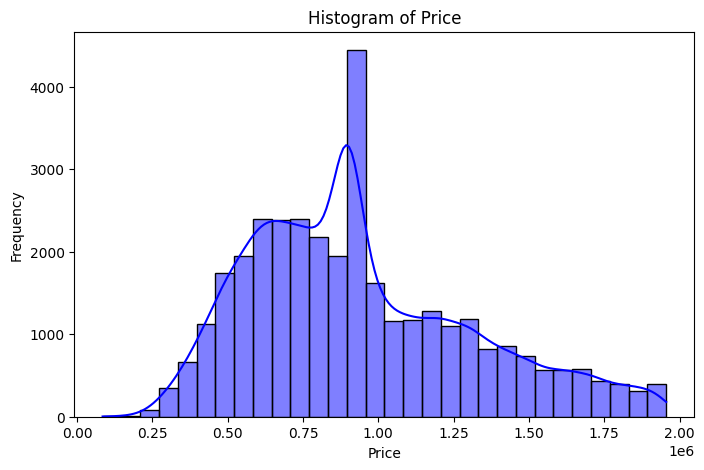

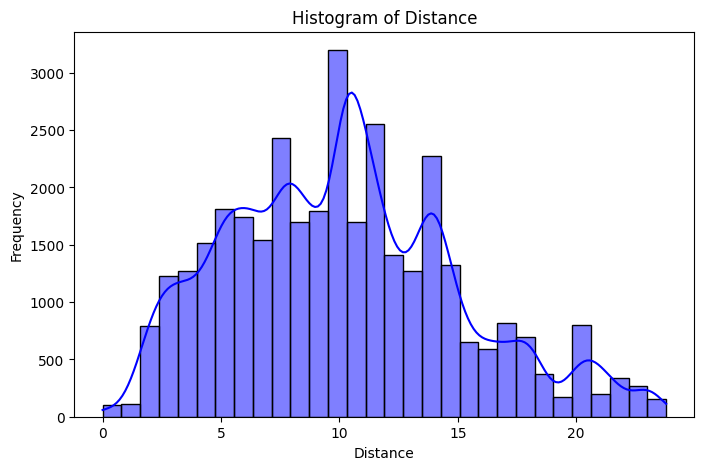

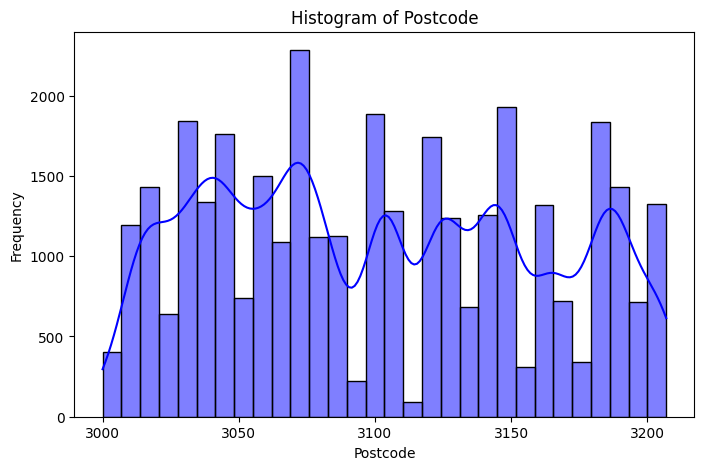

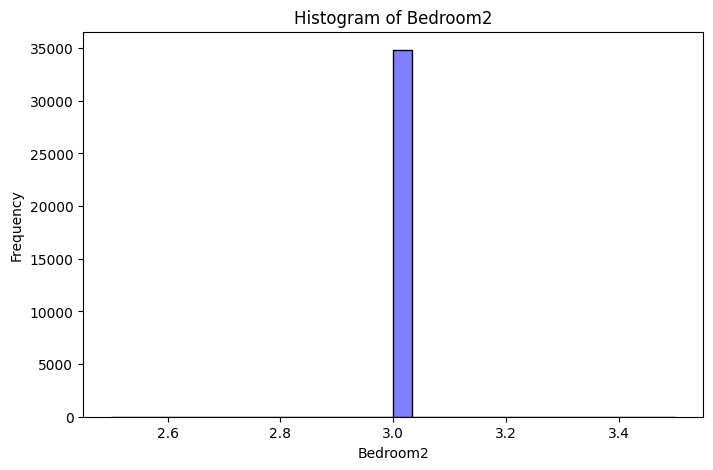

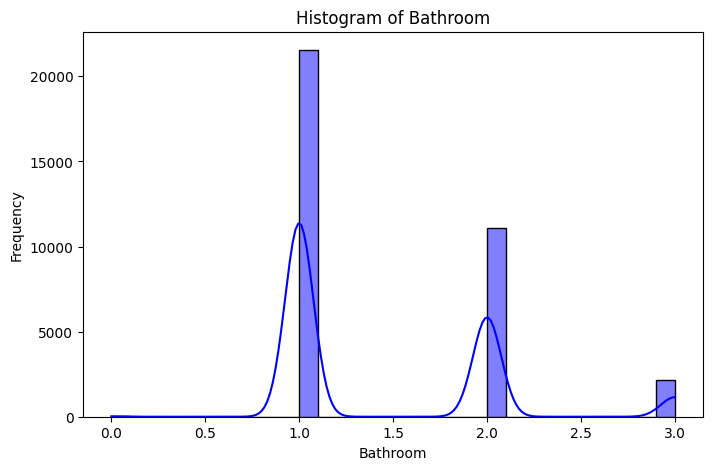

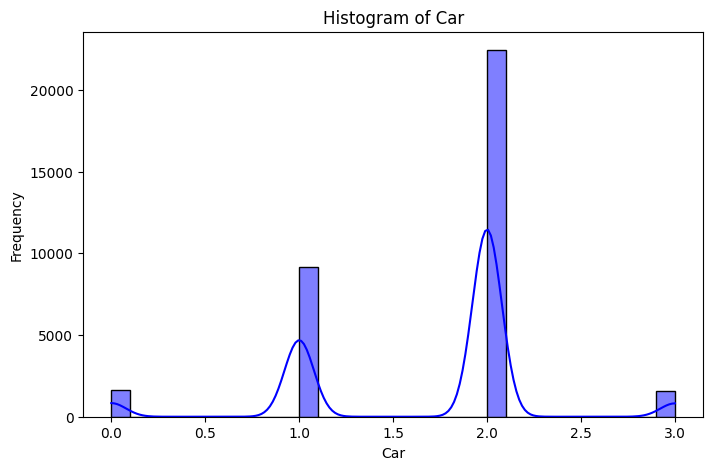

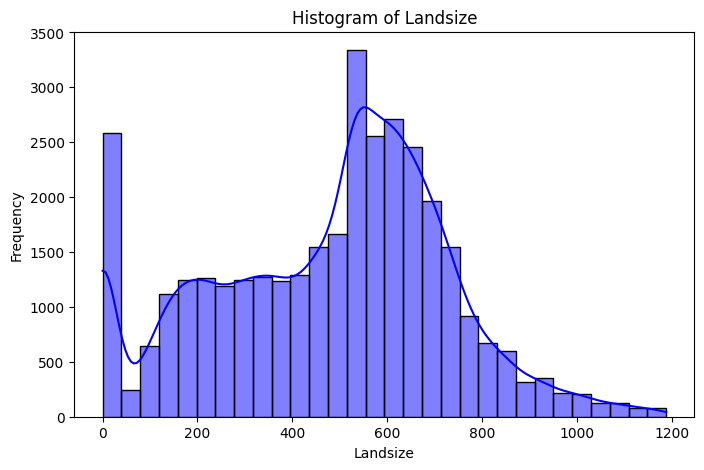

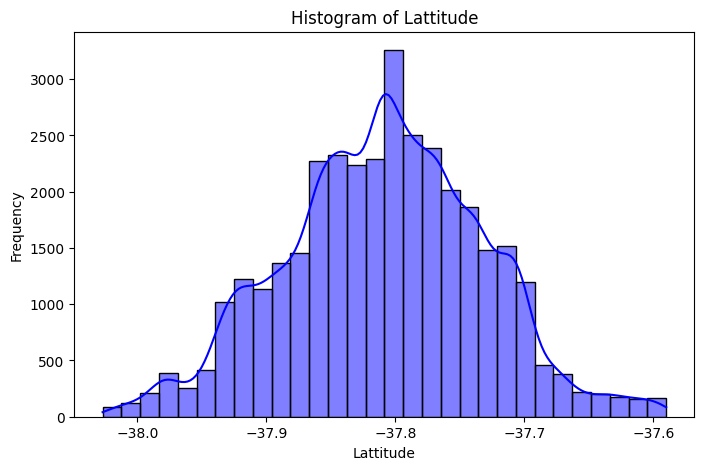

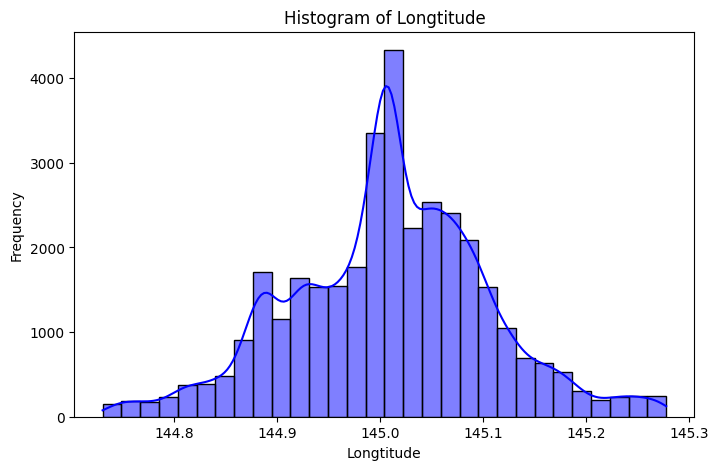

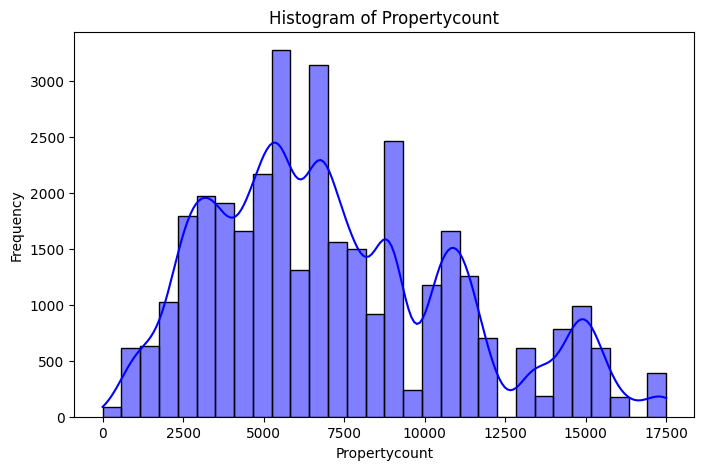

In [229]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color="blue")  # KDE adds a smooth density curve
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Box Plot**

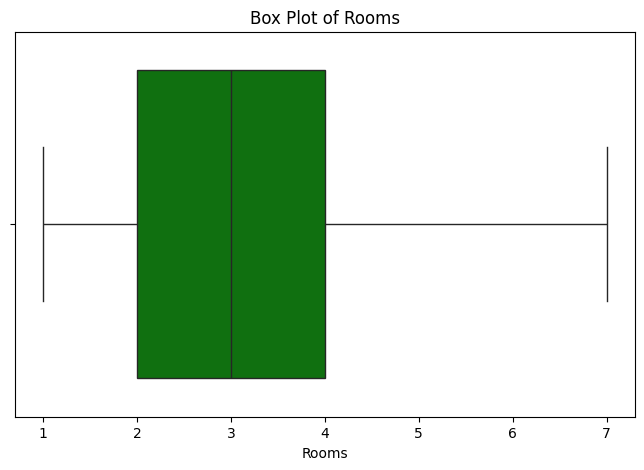

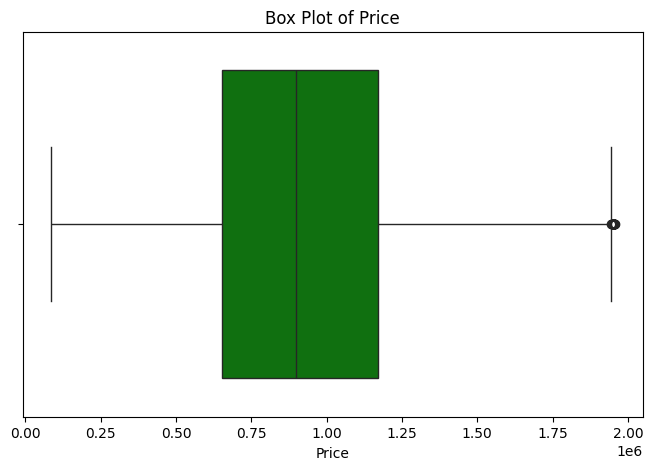

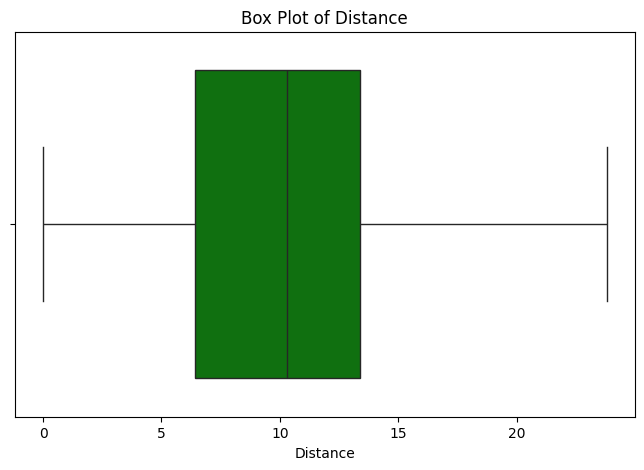

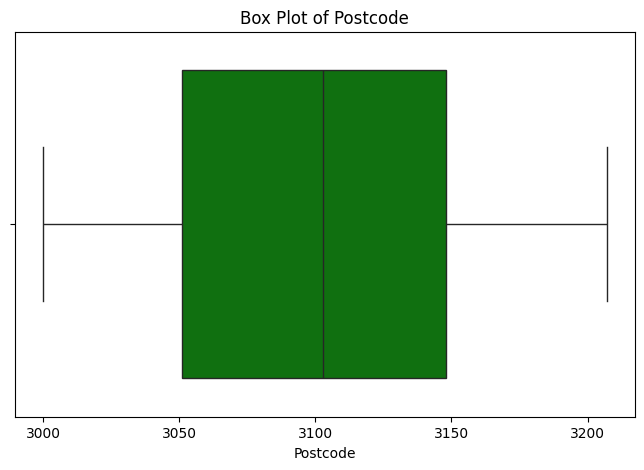

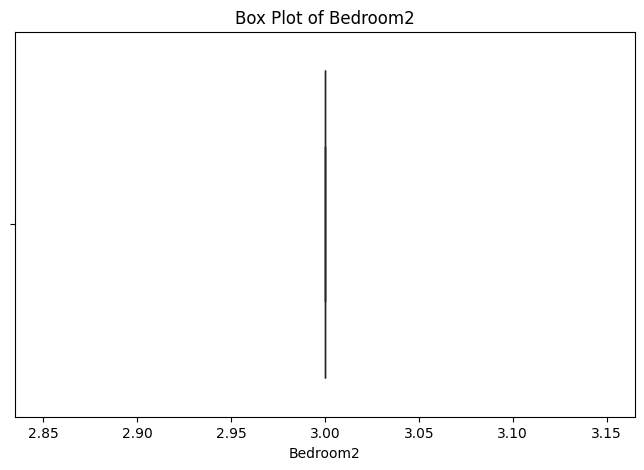

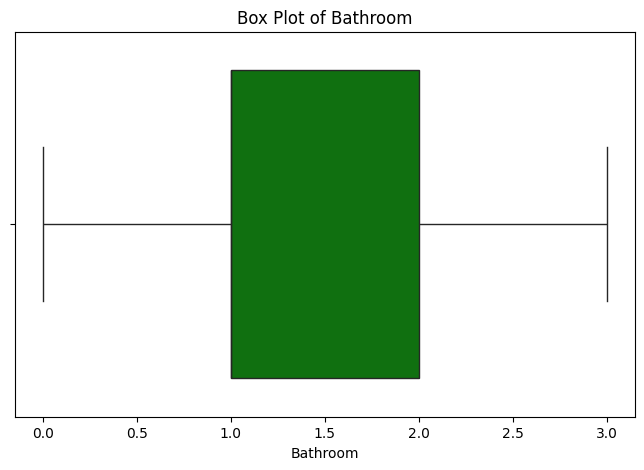

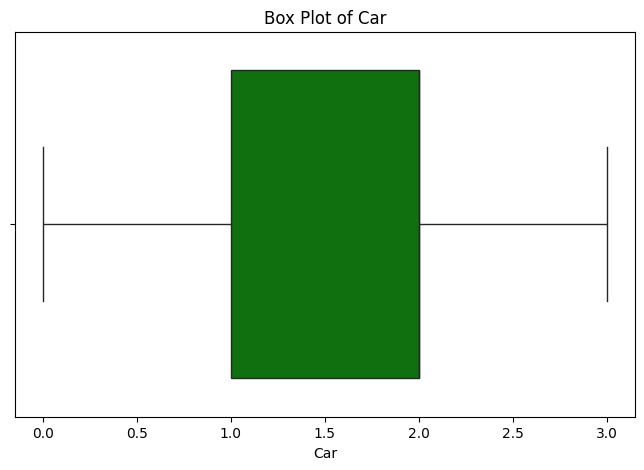

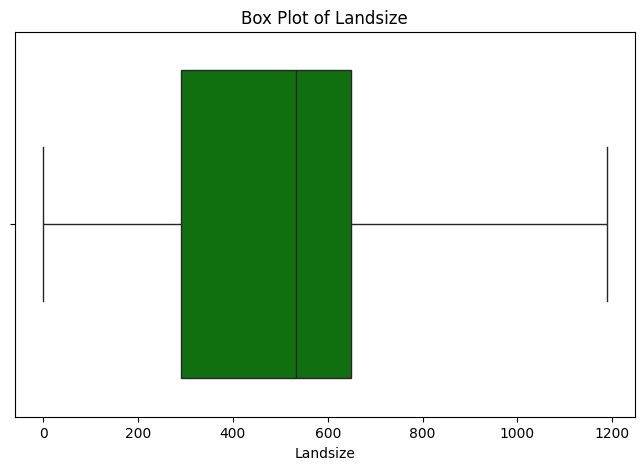

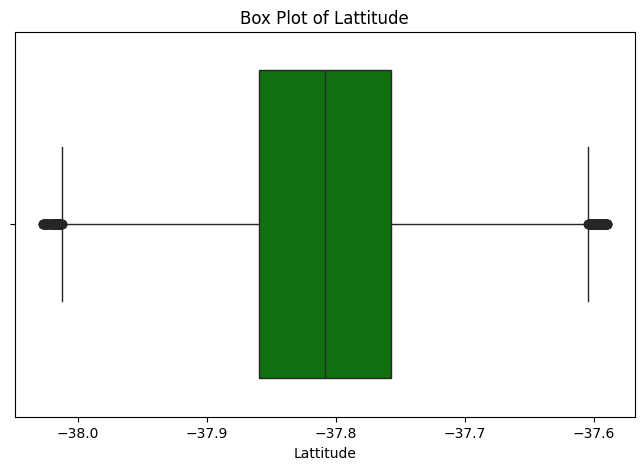

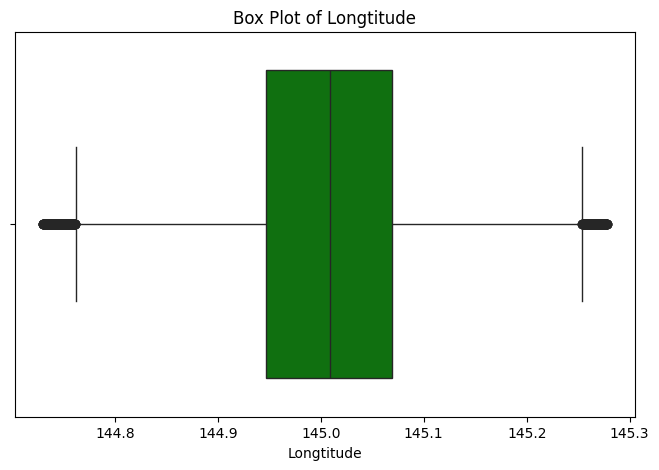

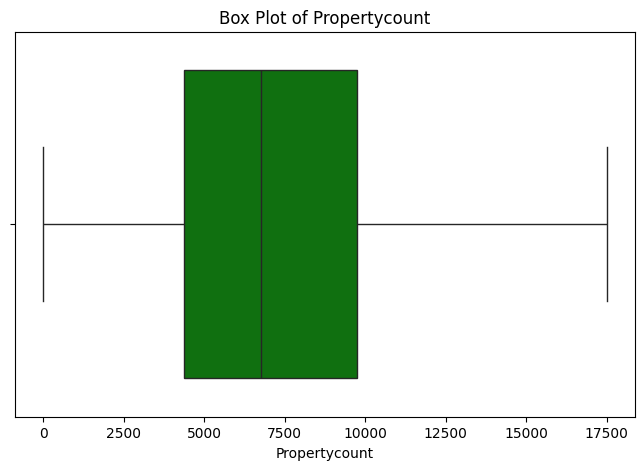

In [230]:
# Plot box plots for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color="green")
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

# **Bivariate Analysis**

**Correlation Matrix**

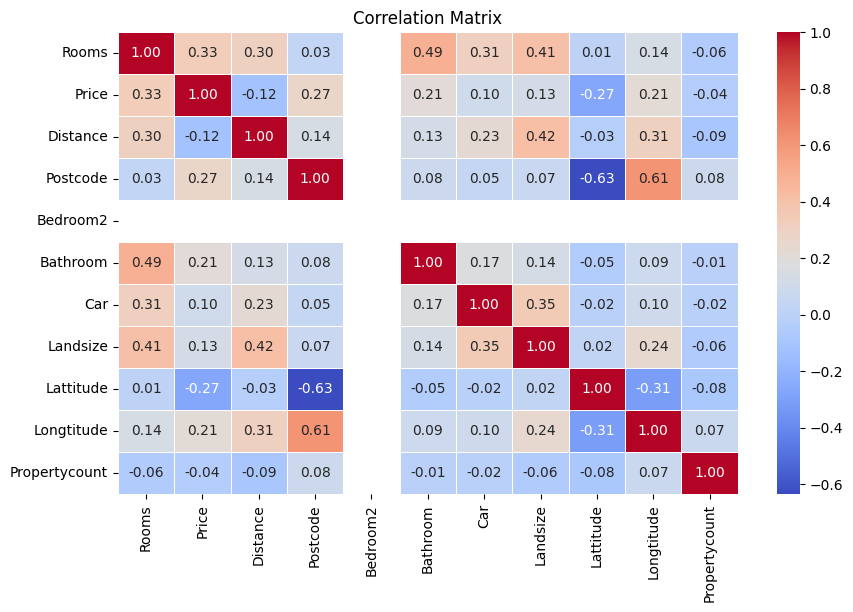

In [248]:
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Scatter plot**

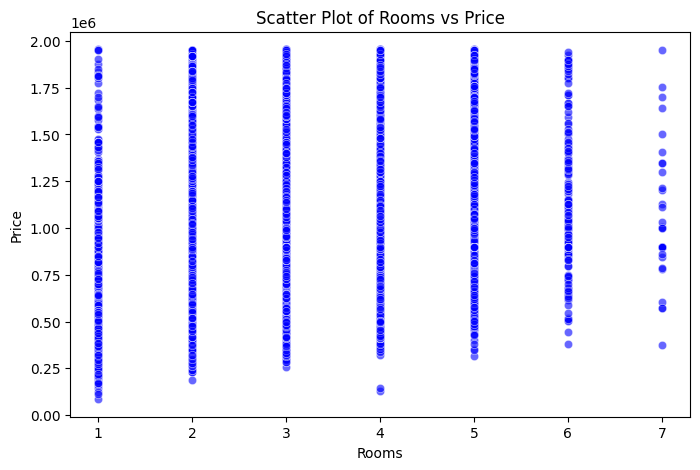

In [232]:
column_x = "Rooms"
column_y = "Price"

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[column_x], y=df[column_y], alpha=0.6, color="blue")
plt.title(f"Scatter Plot of {column_x} vs {column_y}")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

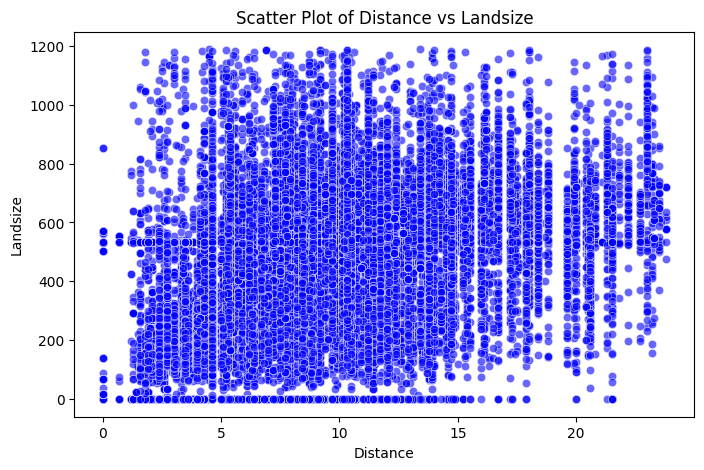

In [233]:
column_x = "Distance"
column_y = "Landsize"

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[column_x], y=df[column_y], alpha=0.6, color="blue")
plt.title(f"Scatter Plot of {column_x} vs {column_y}")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

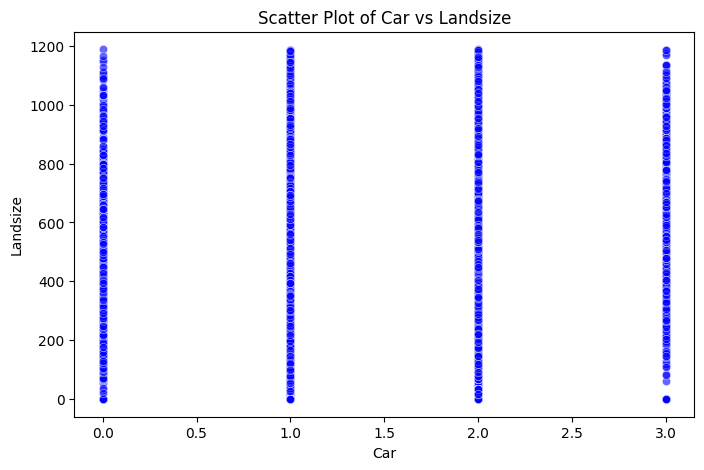

In [234]:
column_x = "Car"
column_y = "Landsize"

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[column_x], y=df[column_y], alpha=0.6, color="blue")
plt.title(f"Scatter Plot of {column_x} vs {column_y}")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

**Bar Plot**

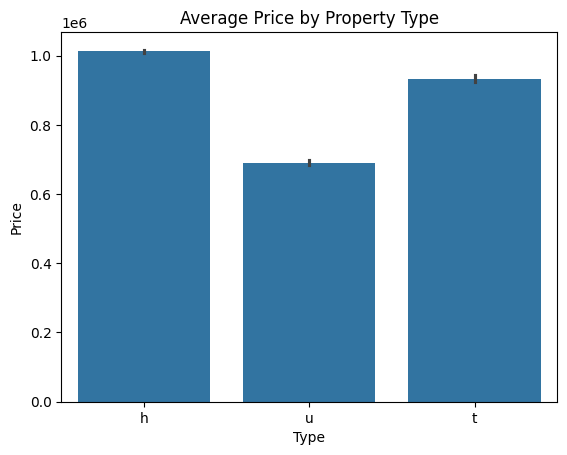

In [235]:
sns.barplot(x=df["Type"], y=df["Price"])
plt.title("Average Price by Property Type")
plt.show()

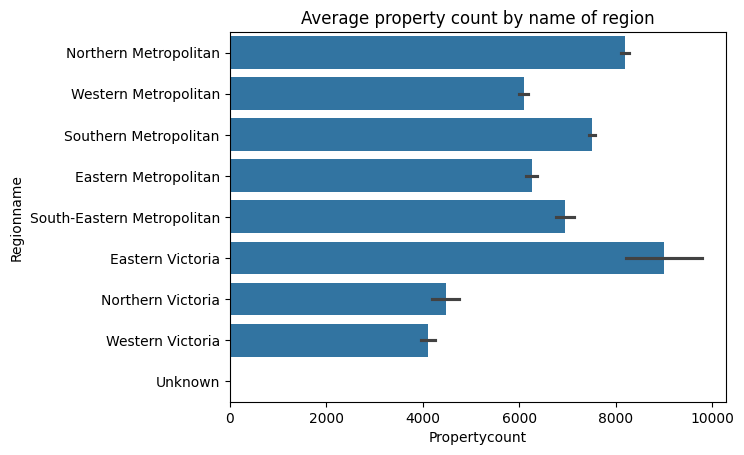

In [242]:
sns.barplot(x=df["Propertycount"], y=df["Regionname"])
plt.title("Average property count by name of region")
plt.show()

**Box Plot**

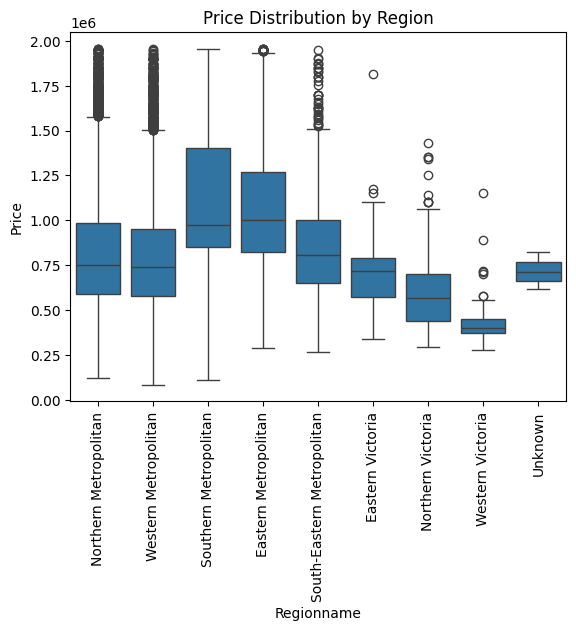

In [237]:
sns.boxplot(x=df["Regionname"], y=df["Price"])
plt.xticks(rotation=90)
plt.title("Price Distribution by Region")
plt.show()

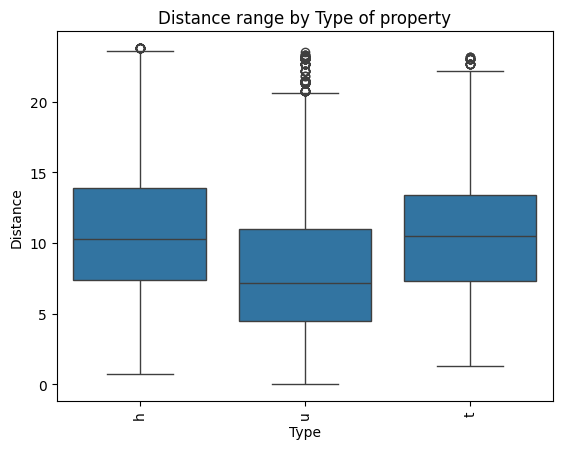

In [244]:
sns.boxplot(x=df["Type"], y=df["Distance"])
plt.xticks(rotation=90)
plt.title("Distance range by Type of property")
plt.show()

**Violin Plot**

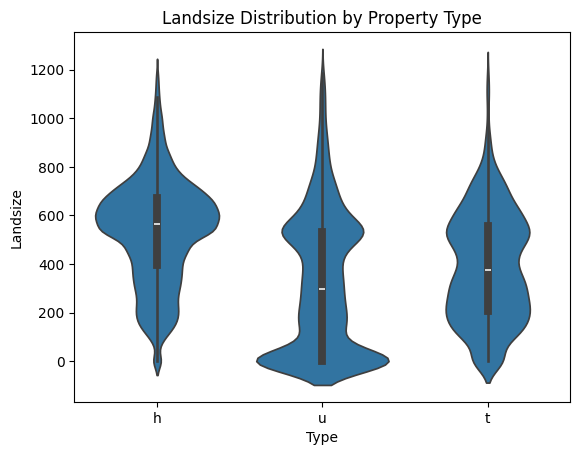

In [239]:
sns.violinplot(x=df["Type"], y=df["Landsize"])
plt.title("Landsize Distribution by Property Type")
plt.show()

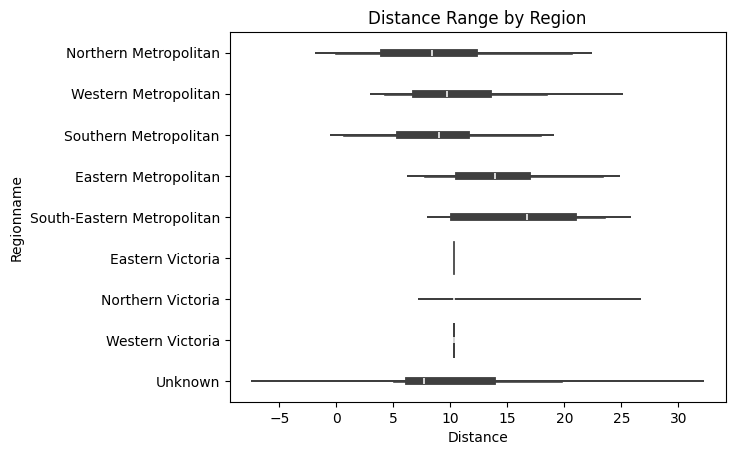

In [245]:
sns.violinplot(x=df["Distance"], y=df["Regionname"])
plt.title("Distance Range by Region")
plt.show()

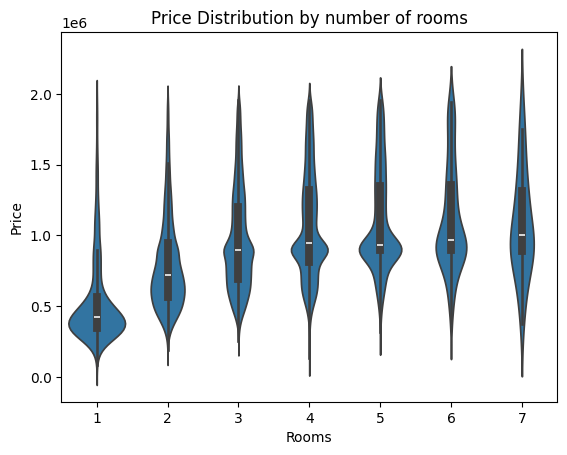

In [246]:
sns.violinplot(x=df["Rooms"], y=df["Price"])
plt.title("Price Distribution by number of rooms")
plt.show()

# **Multivariate Analysis**

**Pair Plot**

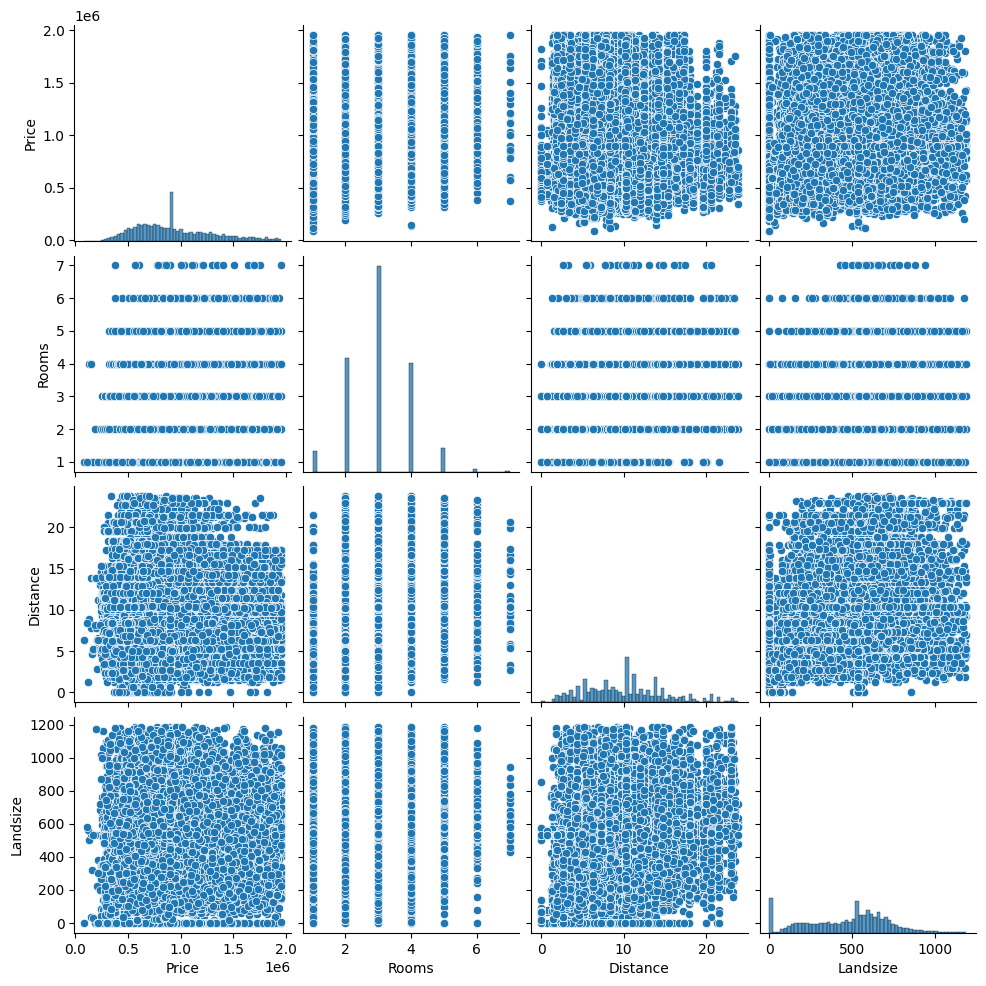

In [247]:
selected_cols = ["Price", "Rooms", "Distance", "Landsize"]
sns.pairplot(df[selected_cols])
plt.show()

**Correlation Heatmap**

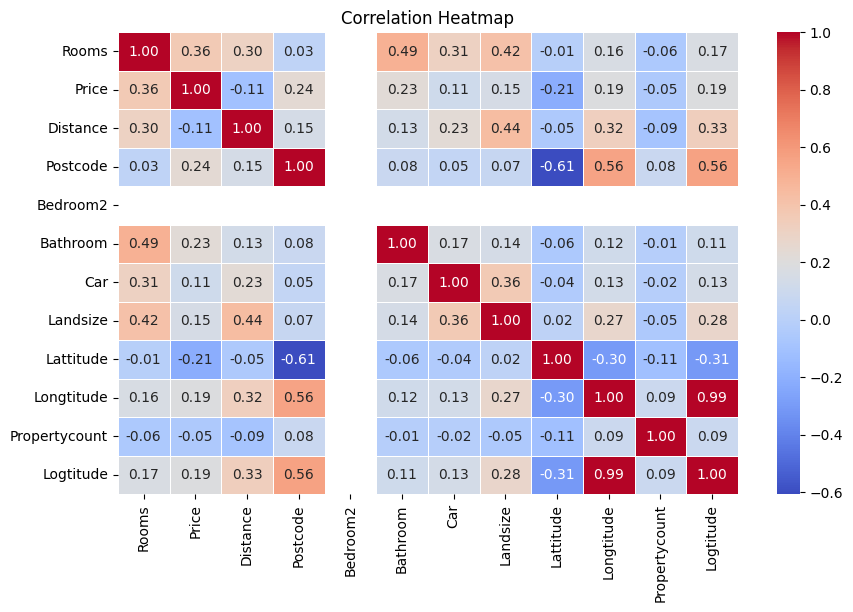

In [184]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### **Grouped Comparisions**

**Bar Plot**

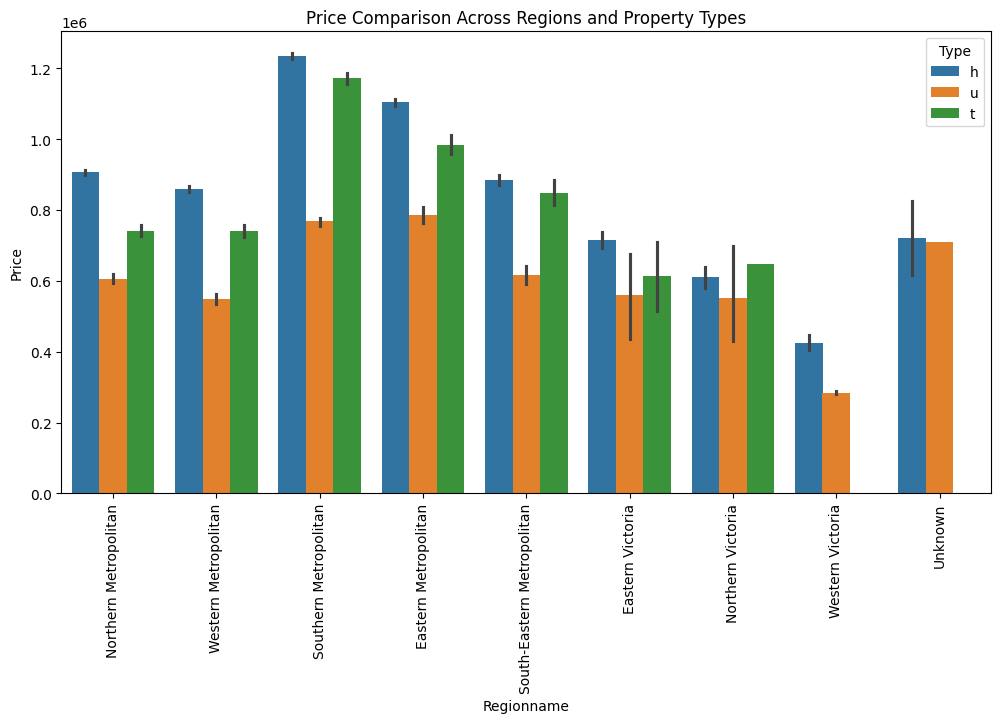

In [249]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Regionname", y="Price", hue="Type", data=df)
plt.xticks(rotation=90)  # Rotate for better readability
plt.title("Price Comparison Across Regions and Property Types")
plt.show()

**Box Plot**

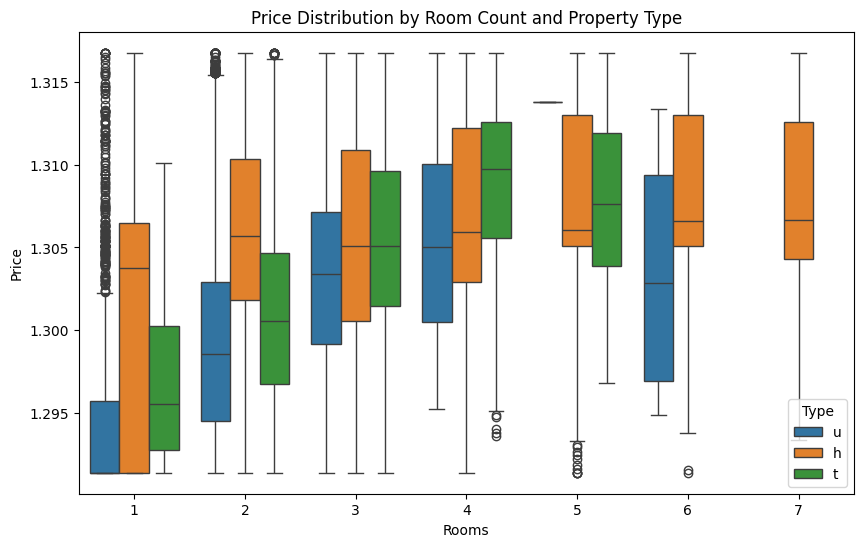

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Rooms", y="Price", hue="Type", data=df)
plt.title("Price Distribution by Room Count and Property Type")
plt.show()